# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [43]:
# Initial imports

import os
import pandas as pd
from newsapi import NewsApiClient
from dotenv import load_dotenv
load_dotenv("example.env")

import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

from nltk.corpus import stopwords, reuters
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import re
import matplotlib.pyplot as plt

# Code to download corpora
import nltk
nltk.download('wordnet')
nltk.download('reuters')
nltk.download('stopwords')
nltk.download('punkt')

import spacy
from spacy import displacy

lemmatizer = WordNetLemmatizer()


%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/jc/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/jc/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package reuters to /Users/jc/nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/jc/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/jc/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [9]:
# Read your api key environment variable
api_key = os.getenv("news_api")

In [10]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [11]:
# Fetch the Bitcoin news articles
bitcoin_headlines = newsapi.get_top_headlines(q="bitcoin", language="en", country="us")
bitcoin_headlines

{'status': 'ok',
 'totalResults': 1,
 'articles': [{'source': {'id': 'cbs-news', 'name': 'CBS News'},
   'author': None,
   'title': 'Why is the price of Bitcoin and other cryptocurrencies falling? - CBS News',
   'description': 'Digital currencies slumped after Chinese banking authorities moved to clamp down on their usage.',
   'url': 'https://www.cbsnews.com/news/crypto-price-bitcoin-down-2021-05-22/',
   'urlToImage': 'https://cbsnews3.cbsistatic.com/hub/i/r/2021/05/19/8edc83f1-a9ea-4f02-b48e-0adb30b98046/thumbnail/1200x630/19382be932428563d70d738adcbe7e9a/2021-05-19t203900z-541777464-rc28jn928g9j-rtrmadp-3-crypto-currency-bitcoin.jpg',
   'publishedAt': '2021-05-22T10:59:29Z',
   'content': 'The price of Bitcoin fell as much as 29% Wednesday after the China Banking Association warned member banks of risks associated with digital currencies. Other digital currencies suffered sharp decline… [+7661 chars]'}]}

In [12]:
# Fetch the Ethereum news articles
ethereum_headlines = newsapi.get_top_headlines(q="ethereum", language="en", country="us")
ethereum_headlines

{'status': 'ok', 'totalResults': 0, 'articles': []}

In [13]:
# Fetch all the news about Bitcoin
bitcoin_headlines = newsapi.get_everything(
    q="bitcoin",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

# Print total articles
print(f"Total articles about Bitcoin: {bitcoin_headlines['totalResults']}")

# Show sample article
bitcoin_headlines["articles"][0]

Total articles about Bitcoin: 11914


{'source': {'id': 'engadget', 'name': 'Engadget'},
 'author': 'https://www.engadget.com/about/editors/richard-lawler',
 'title': "Tesla 'suspends' Bitcoin car purchases citing environmental impact",
 'description': "You can't buy a Tesla with Bitcoin anymore..",
 'url': 'https://www.engadget.com/elon-musk-bitcoin-221708146.html',
 'urlToImage': 'https://s.yimg.com/os/creatr-uploaded-images/2021-05/a0f90c30-b36f-11eb-aff6-04fb28cf2f4b',
 'publishedAt': '2021-05-12T22:17:08Z',
 'content': 'Just weeks after Tesla started accepting Bitcoin as currency for cars, Elon Musk revealed in a tweet that it will "suspend" the effort. According to the release (Tesla does not appear to have a funct… [+768 chars]'}

In [32]:
#VADER Sentiment Score
article = bitcoin_headlines["articles"][0]

In [15]:
## each iteration

text = article["content"]
date = article["publishedAt"][:10]
sentiment = analyzer.polarity_scores(text)
compound = sentiment["compound"]
pos = sentiment["pos"]
neu = sentiment["neu"]
neg = sentiment["neg"]

print(f'positive score: {pos}')
print(f'neutral score: {neu}')
print(f'negative score: {neg}')

positive score: 0.071
neutral score: 0.929
negative score: 0.0


In [16]:
# Describe the Bitcoin Sentiment
bitcoin_sentiments = []

for article in bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
bitcoin_df = bitcoin_df[cols]
bitcoin_df.head()


,date,text,compound,positive,negative,neutral
0,2021-05-12,Just weeks after Tesla started accepting Bitco...,0.3818,0.071,0.00,0.929
1,2021-05-07,Shares of Square are up more than 6% today aft...,0.2960,0.058,0.00,0.942
2,2021-04-27,Tesla’s relationship with bitcoin is not a dal...,0.0000,0.000,0.00,1.000
3,2021-05-12,Image: Tesla\r\n\n \n\n Tesla has stopped acce...,0.4939,0.134,0.05,0.816
4,2021-04-23,Cryptocurrency prices continued to tumble Frid...,0.0000,0.000,0.00,1.000


In [17]:
# Fetch all the news about Ethereum
ethereum_headlines = newsapi.get_everything(
    q="ethereum",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

# Print total articles
print(f"Total articles about Ethereum: {ethereum_headlines['totalResults']}")

# Show sample article
ethereum_headlines["articles"][0]


Total articles about Ethereum: 4675


{'source': {'id': 'techcrunch', 'name': 'TechCrunch'},
 'author': 'Manish Singh',
 'title': 'Vitalik Buterin donates $1 billion worth of ‘meme coins’ to India Covid Relief Fund',
 'description': 'Vitalik Buterin, the creator of Ethereum, on Wednesday donated Ethereum and “meme coins” worth $1.5 billion in one of the largest-ever individual philanthropy efforts. Buterin transferred 500 ETH and over 50 trillion SHIB (Shiba Inu), a meme coin, worth aroun…',
 'url': 'http://techcrunch.com/2021/05/12/vitalik-buterin-donates-1-billion-worth-of-meme-coins-to-india-covid-relief-fund/',
 'urlToImage': 'https://techcrunch.com/wp-content/uploads/2017/09/vitalik-buterin-147a2566.jpg?w=600',
 'publishedAt': '2021-05-12T22:46:10Z',
 'content': 'Vitalik Buterin, the creator of Ethereum, on Wednesday donated Ethereum and meme coins worth $1.5 billion in one of the largest-ever individual philanthropy efforts.\r\nButerin transferred 500 ETH and … [+1667 chars]'}

In [18]:
#VADER Sentiment Score
article = ethereum_headlines["articles"][0]

In [19]:
## each iteration

text = article["content"]
date = article["publishedAt"][:10]
sentiment = analyzer.polarity_scores(text)
compound = sentiment["compound"]
pos = sentiment["pos"]
neu = sentiment["neu"]
neg = sentiment["neg"]

print(f'positive score: {pos}')
print(f'neutral score: {neu}')
print(f'negative score: {neg}')

positive score: 0.06
neutral score: 0.94
negative score: 0.0


In [20]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
ethereum_df = ethereum_df[cols]
ethereum_df.head()

,date,text,compound,positive,negative,neutral
0,2021-05-12,"Vitalik Buterin, the creator of Ethereum, on W...",0.2263,0.060,0.000,0.940
1,2021-05-04,Their investors call them disruptive innovator...,-0.2144,0.054,0.111,0.835
2,2021-05-15,Solana isn’t known yet outside of the crypto c...,0.5499,0.106,0.000,0.894
3,2021-05-01,New York (CNN Business)Bitcoin prices continue...,0.0000,0.000,0.000,1.000
4,2021-05-03,"The creators behind CryptoPunks, one of the mo...",0.4754,0.091,0.000,0.909


In [21]:
bitcoin_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.00000
mean,0.066883,0.055280,0.039110,0.90564
std,0.397988,0.067863,0.053804,0.08300
min,-0.762700,0.000000,0.000000,0.67700
25%,-0.058450,0.000000,0.000000,0.85450
50%,0.000000,0.019500,0.000000,0.91250
75%,0.381800,0.081750,0.070250,1.00000
max,0.845500,0.275000,0.219000,1.00000


In [22]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.054273,0.047440,0.035430,0.907120
std,0.336819,0.055704,0.059887,0.122004
min,-0.918600,0.000000,0.000000,0.000000
25%,-0.019300,0.000000,0.000000,0.857250
50%,0.000000,0.046000,0.000000,0.928000
75%,0.238025,0.077250,0.067250,1.000000
max,0.822500,0.256000,0.289000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin has the highest mean positive score: 0.06442

Q: Which coin had the highest compound score?

A: Bitcoin had the highest compound score

Q. Which coin had the highest positive score?

A: Bitcoin had the highest positive score

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [104]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/jc/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [105]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
#words = word_tokenize(article)
sw = set(stopwords.words('english'))
print(sw)

{"haven't", 'just', 'down', 'out', 'that', 'or', 'not', "wasn't", 'she', 'very', 'wasn', 'until', 'yourself', 'their', 'about', 'too', 's', 'some', 'his', "shan't", 'now', 'itself', 'd', "hadn't", 'for', 'of', 'in', "should've", 'ourselves', "won't", 'no', 'wouldn', 'you', "she's", 'above', 'me', 'herself', 'o', 'him', 'don', 'is', 'doesn', 'all', 'needn', 'before', 'shan', 'had', 'whom', 'off', "isn't", 'an', 'other', 'during', 'have', 'y', 'again', 'but', 've', 'being', 'hasn', 'yourselves', 'few', 'the', 'those', "mustn't", 'we', 'myself', "don't", 'own', "you'll", 'hadn', 'under', 'further', 'couldn', 'having', 'weren', "didn't", 'when', 'ain', "it's", 'won', 'did', 'been', 'these', 'while', 'your', 'shouldn', 'as', 'was', 'do', 'against', "shouldn't", 'after', 'mightn', 'theirs', 'they', 'does', 'ma', 'at', 'then', 'were', 'doing', 'both', 'am', "aren't", 'which', 'm', 'through', 're', 'be', 'hers', 'there', 'than', 'i', 'll', 'can', 'who', "wouldn't", 'once', 'a', 'between', 'onl

In [117]:
# Expand the default stopwords list if necessary
sw_addon = {'far', 'ahead'}
words = []
second_result = [word.lower() for word in words if word.lower() not in sw.union(sw_addon)]
# NLTK list of stopwords
print(second_result)

[]


In [118]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
   
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
    output = [word.lower() for word in lem if word.lower() not in sw]
    
    # Remove the stop words
    
    
    return tokens

In [13]:
# Create a new tokens column for Bitcoin
# YOUR CODE HERE!

In [14]:
# Create a new tokens column for Ethereum
# YOUR CODE HERE!

---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [33]:
from collections import Counter
from nltk import ngrams

In [34]:
def process_text(doc):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', article)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return output

In [101]:
article = ethereum_headlines["articles"][0]

In [ ]:
# Generate the Bitcoin N-grams where N=2
processed = process_text(article)

bigram_counts = Counter(ngrams(processed, n=2))
print(dict(bigram_counts))

In [ ]:
# Generate the Ethereum N-grams where N=2
bigram_counts = Counter(ngrams(processed, n=2))
print(dict(bigram_counts))

In [38]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [19]:
# Use token_count to get the top 10 words for Bitcoin
# YOUR CODE HERE!

In [20]:
# Use token_count to get the top 10 words for Ethereum
# YOUR CODE HERE!

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [110]:
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [111]:
# Generate the Bitcoin word cloud
ids = reuters.fileids(categories='gold')
corpus = [reuters.raw(i) for i in ids]

def process_text(doc):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', doc)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return ' '.join(output)

In [112]:
# Process text for wordcloud creation
big_string = ' '.join(corpus)
input_text = process_text(big_string)

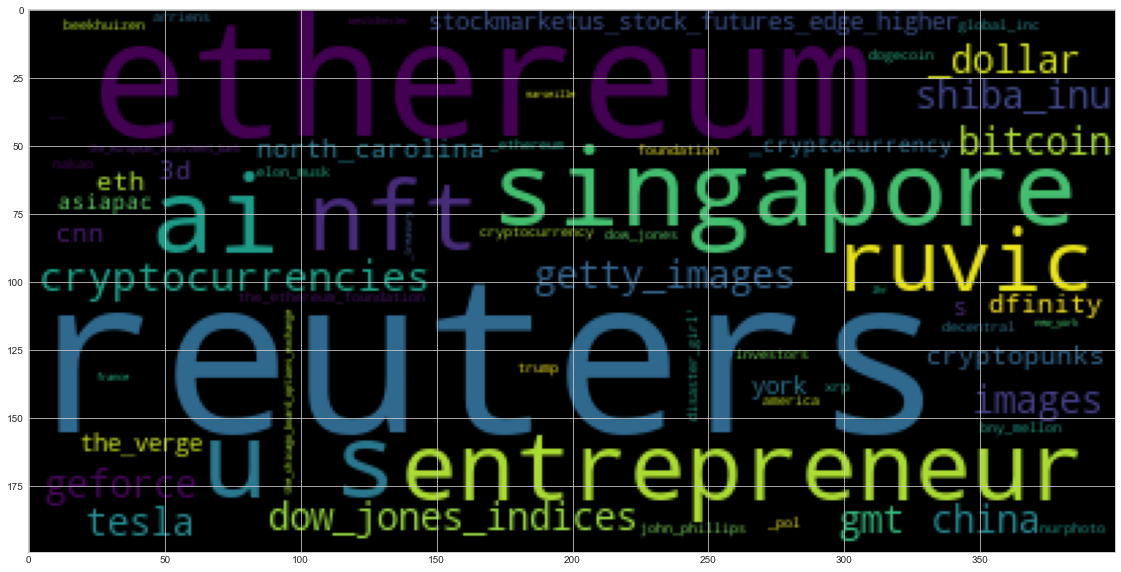

In [113]:
# Generate the Ethereum word cloud
wc = WordCloud().generate(' '.join(entities))
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [41]:
import spacy
from spacy import displacy

In [39]:
# Download the language model for SpaCy
!python -m spacy download en_core_web_sm

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [44]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [67]:
# Concatenate all of the Bitcoin text together
bitcoin_df

,date,text,compound,positive,negative,neutral
0,2021-05-12,Just weeks after Tesla started accepting Bitco...,0.3818,0.071,0.000,0.929
1,2021-05-07,Shares of Square are up more than 6% today aft...,0.2960,0.058,0.000,0.942
2,2021-04-27,Tesla’s relationship with bitcoin is not a dal...,0.0000,0.000,0.000,1.000
3,2021-05-12,Image: Tesla\r\n\n \n\n Tesla has stopped acce...,0.4939,0.134,0.050,0.816
4,2021-04-23,Cryptocurrency prices continued to tumble Frid...,0.0000,0.000,0.000,1.000
...,...,...,...,...,...,...
95,2021-05-11,Humpback whales breached in unison off the coa...,0.0772,0.039,0.000,0.961
96,2021-05-19,The logo of the Bitcoin digital currency is se...,0.0000,0.000,0.000,1.000
97,2021-05-21,A representation of virtual currency Bitcoin i...,0.5859,0.142,0.000,0.858
98,2021-05-05,It’s a trickier question than you might think....,-0.2023,0.057,0.105,0.838


In [94]:
#Drop all columns in Dataframe
btc_text=bitcoin_df.drop(['date', 'compound','positive','negative','neutral'], axis=1)
btc_text

,text
0,Just weeks after Tesla started accepting Bitco...
1,Shares of Square are up more than 6% today aft...
2,Tesla’s relationship with bitcoin is not a dal...
3,Image: Tesla\r\n\n \n\n Tesla has stopped acce...
4,Cryptocurrency prices continued to tumble Frid...
...,...
95,Humpback whales breached in unison off the coa...
96,The logo of the Bitcoin digital currency is se...
97,A representation of virtual currency Bitcoin i...
98,It’s a trickier question than you might think....


In [95]:
# Run the NER processor on all of the text
btc_list = btc_text["text"].tolist()
article=",".join(btc_list)

# Add a title to the document
doc = nlp(article)


In [90]:
# Render the visualization
displacy.render(doc, style='ent')


In [98]:
# List all Entities
entities = [ent.text for ent in doc.ents if ent.label_ in ['MONEY', 'PERSON']]
print([ent.text for ent in doc.ents if ent.label_ == 'MONEY'])

['$1.5 billion', 'nearly $58,000', 'hundreds of billions', '3,000', '3,000', '50,000', 'above $3,000', '$3,000 mark', '$1 trillion', 'about one hundred billion trillion dollars', 'above $3,000', '4,000', '$13 million', '3,203', '4,000', 'over $500,000', 'above $2,560', '$300 billion', '50,269.9', '906.75', 'about 12 cents', '47,000', '$121 million', 'Millions of dollars', '57,098.08', '3,504.11', '$56,852.03', '49,337.72', '2,628.83', '27,734', '50,000', '$100 million', '12k', 'between $40,00…', 'half a trillion dollars', '30,000', '$1 million', '$1 million', '$40,000 mark']


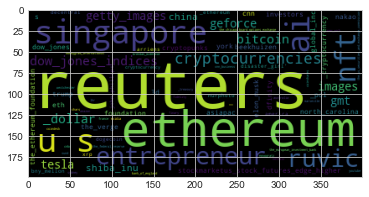

In [109]:
# lower and join each entity for word cloud creation
entities = [i.lower().replace(' ', '_') for i in entities]
# Generate wordcloud
wc = WordCloud().generate(' '.join(entities))
plt.imshow(wc)

---

### Ethereum NER

In [92]:
# Concatenate all of the Ethereum text together
ethereum_df

,date,text,compound,positive,negative,neutral
0,2021-05-12,"Vitalik Buterin, the creator of Ethereum, on W...",0.2263,0.060,0.000,0.940
1,2021-05-04,Their investors call them disruptive innovator...,-0.2144,0.054,0.111,0.835
2,2021-05-15,Solana isn’t known yet outside of the crypto c...,0.5499,0.106,0.000,0.894
3,2021-05-01,New York (CNN Business)Bitcoin prices continue...,0.0000,0.000,0.000,1.000
4,2021-05-03,"The creators behind CryptoPunks, one of the mo...",0.4754,0.091,0.000,0.909
...,...,...,...,...,...,...
95,2021-04-24,"Ripple co-founder, Chris Larsen.\r\nBankXRP/Yo...",-0.5267,0.000,0.105,0.895
96,2021-05-19,"Bitcoin, Ethereum and other major cryptocurren...",-0.1779,0.062,0.083,0.855
97,2021-05-19,"Bitcoin tumbled below the $40,000 mark on Wedn...",-0.0772,0.068,0.136,0.796
98,2021-05-11,Humpback whales breached in unison off the coa...,0.0772,0.039,0.000,0.961


In [93]:
eth_text=ethereum_df.drop(['date', 'compound','positive','negative','neutral'], axis=1)
eth_text

,text
0,"Vitalik Buterin, the creator of Ethereum, on W..."
1,Their investors call them disruptive innovator...
2,Solana isn’t known yet outside of the crypto c...
3,New York (CNN Business)Bitcoin prices continue...
4,"The creators behind CryptoPunks, one of the mo..."
...,...
95,"Ripple co-founder, Chris Larsen.\r\nBankXRP/Yo..."
96,"Bitcoin, Ethereum and other major cryptocurren..."
97,"Bitcoin tumbled below the $40,000 mark on Wedn..."
98,Humpback whales breached in unison off the coa...


In [100]:
# Run the NER processor on all of the text
eth_list = eth_text["text"].tolist()
article_eth=",".join(eth_list)

# Add a title to the document
doc = nlp(article_eth)

In [97]:
# Render the visualization
displacy.render(doc, style='ent')


In [99]:
# List all Entities
entities = [ent.text for ent in doc.ents if ent.label_ in ['ORG', 'GPE']]
print([ent.text for ent in doc.ents if ent.label_ == 'ORG'])

['Ethereum', 'Ethereum', 'ETH', 'CNN', 'CryptoPunks', 'NFT', '3D', 'Reuters', 'Dfinity', 'StockMarketUS Stock Futures Edge Higher', 'AI', 'Cryptocurrencies', 'Dow Jones Indices', 'Reuters', 'Reuters', 'Reuters', 'Reuters', 'Reuters', 'Reuters', 'Entrepreneur', 'AI', 'The Verge\r\n\n \n\n Cryptocurrency', 'Ethereum', 'AsiaPac', 'Ethereum', 'Dow Jones Indices', 'AI', 'Cryptocurrencies', 'Ethereum', 'Bitcoin', 'Ethereum', 'U.S. Dollar', 'the Ethereum Foundation', 'Beekhuizen', 'Reuters', 'Reuters', 'Global Inc', 'Ruvic/Reuters\r\n', 'Ethereum', 'Reuters', 'Reuters', 'Ethereum', 'Ruvic/Reuters', 'Reuters', 'AI', 'Nakao/Getty Images\r\nInvestors', 'Dow Jones', 'Ethereum, Pol', 'Trump', 'Elon Musk’s', 'NFT', 'NFT', 'Foundation', "Disaster Girl'", 'Images/John Phillips', 'Ruvic/Reuters', 'Reuters', 'Reuters', 'Ethereum', 'Decentral\r\nEthereum', 'BNY Mellon', 'XRP', 'Bitcoin, Ethereum', 'Arriens/NurPhoto', 'Getty Images\r\nCryptocurrency', 'Reuters', 'The European Investment Bank', 'Reuters',

In [106]:
# lower and join each entity for word cloud creation
entities = [i.lower().replace(' ', '_') for i in entities]


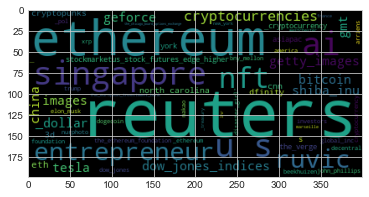

In [107]:
# Generate wordcloud
wc = WordCloud().generate(' '.join(entities))
plt.imshow(wc)

---